In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import TargetEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from collections import Counter


In [40]:
# TOTO FUNGUJE KED JE ZAPNUTY SHUFFLE !!!!
# NIE JE RIESENIE VYPNUT SHUFFLE PRE TRAIN GENERATOR
def get_predictions_train(model, dataset):
    y_pred = []  # store predicted labels
    y_true = []  # store true labels

    # iterate over the dataset
    for image_batch, label_batch in dataset:
        # append true labels
        y_true.append(label_batch)
        # compute predictions
        preds = model.predict(image_batch, verbose=0)
        # append predicted labels
        y_pred.append(np.argmax(preds, axis=- 1))

    # convert the true and predicted labels into tensors
    y_true = tf.concat([item for item in y_true], axis=0)
    y_pred_classes = tf.concat([item for item in y_pred], axis=0)
    class_labels = list(dataset.class_names)

    return y_true, y_pred_classes, class_labels

In [ ]:
batch_size = 32
def count_images_in_classes(dataset):
    class_counts = Counter()
    for images, labels in dataset.unbatch():
        class_index = tf.argmax(labels).numpy()  # Získanie indexu triedy
        class_counts[class_index] += 1
    return class_counts

print("Train_ds:")
train_ds = keras.utils.image_dataset_from_directory(
    directory='bird_dataset/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(256, 256))
for index, count in count_images_in_classes(train_ds).items():
    print(f"  Trieda '{train_ds.class_names[index]}': {count} obrázkov")
print("===================================")
print("Validation_ds:")
validation_ds = keras.utils.image_dataset_from_directory(
    directory='bird_dataset/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(256, 256))
for index, count in validation_ds.items():
    print(f"  Trieda '{validation_ds.class_names[index]}': {count} obrázkov")
print("===================================")
print("Test_ds:")
test_ds = keras.utils.image_dataset_from_directory(
    directory='bird_dataset/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(256, 256))
for index, count in test_ds.items():
    print(f"  Trieda '{test_ds.class_names[index]}': {count} obrázkov")
print("===================================")



Train_ds:
Found 6400 files belonging to 200 classes.


AttributeError: '_PrefetchDataset' object has no attribute 'items'

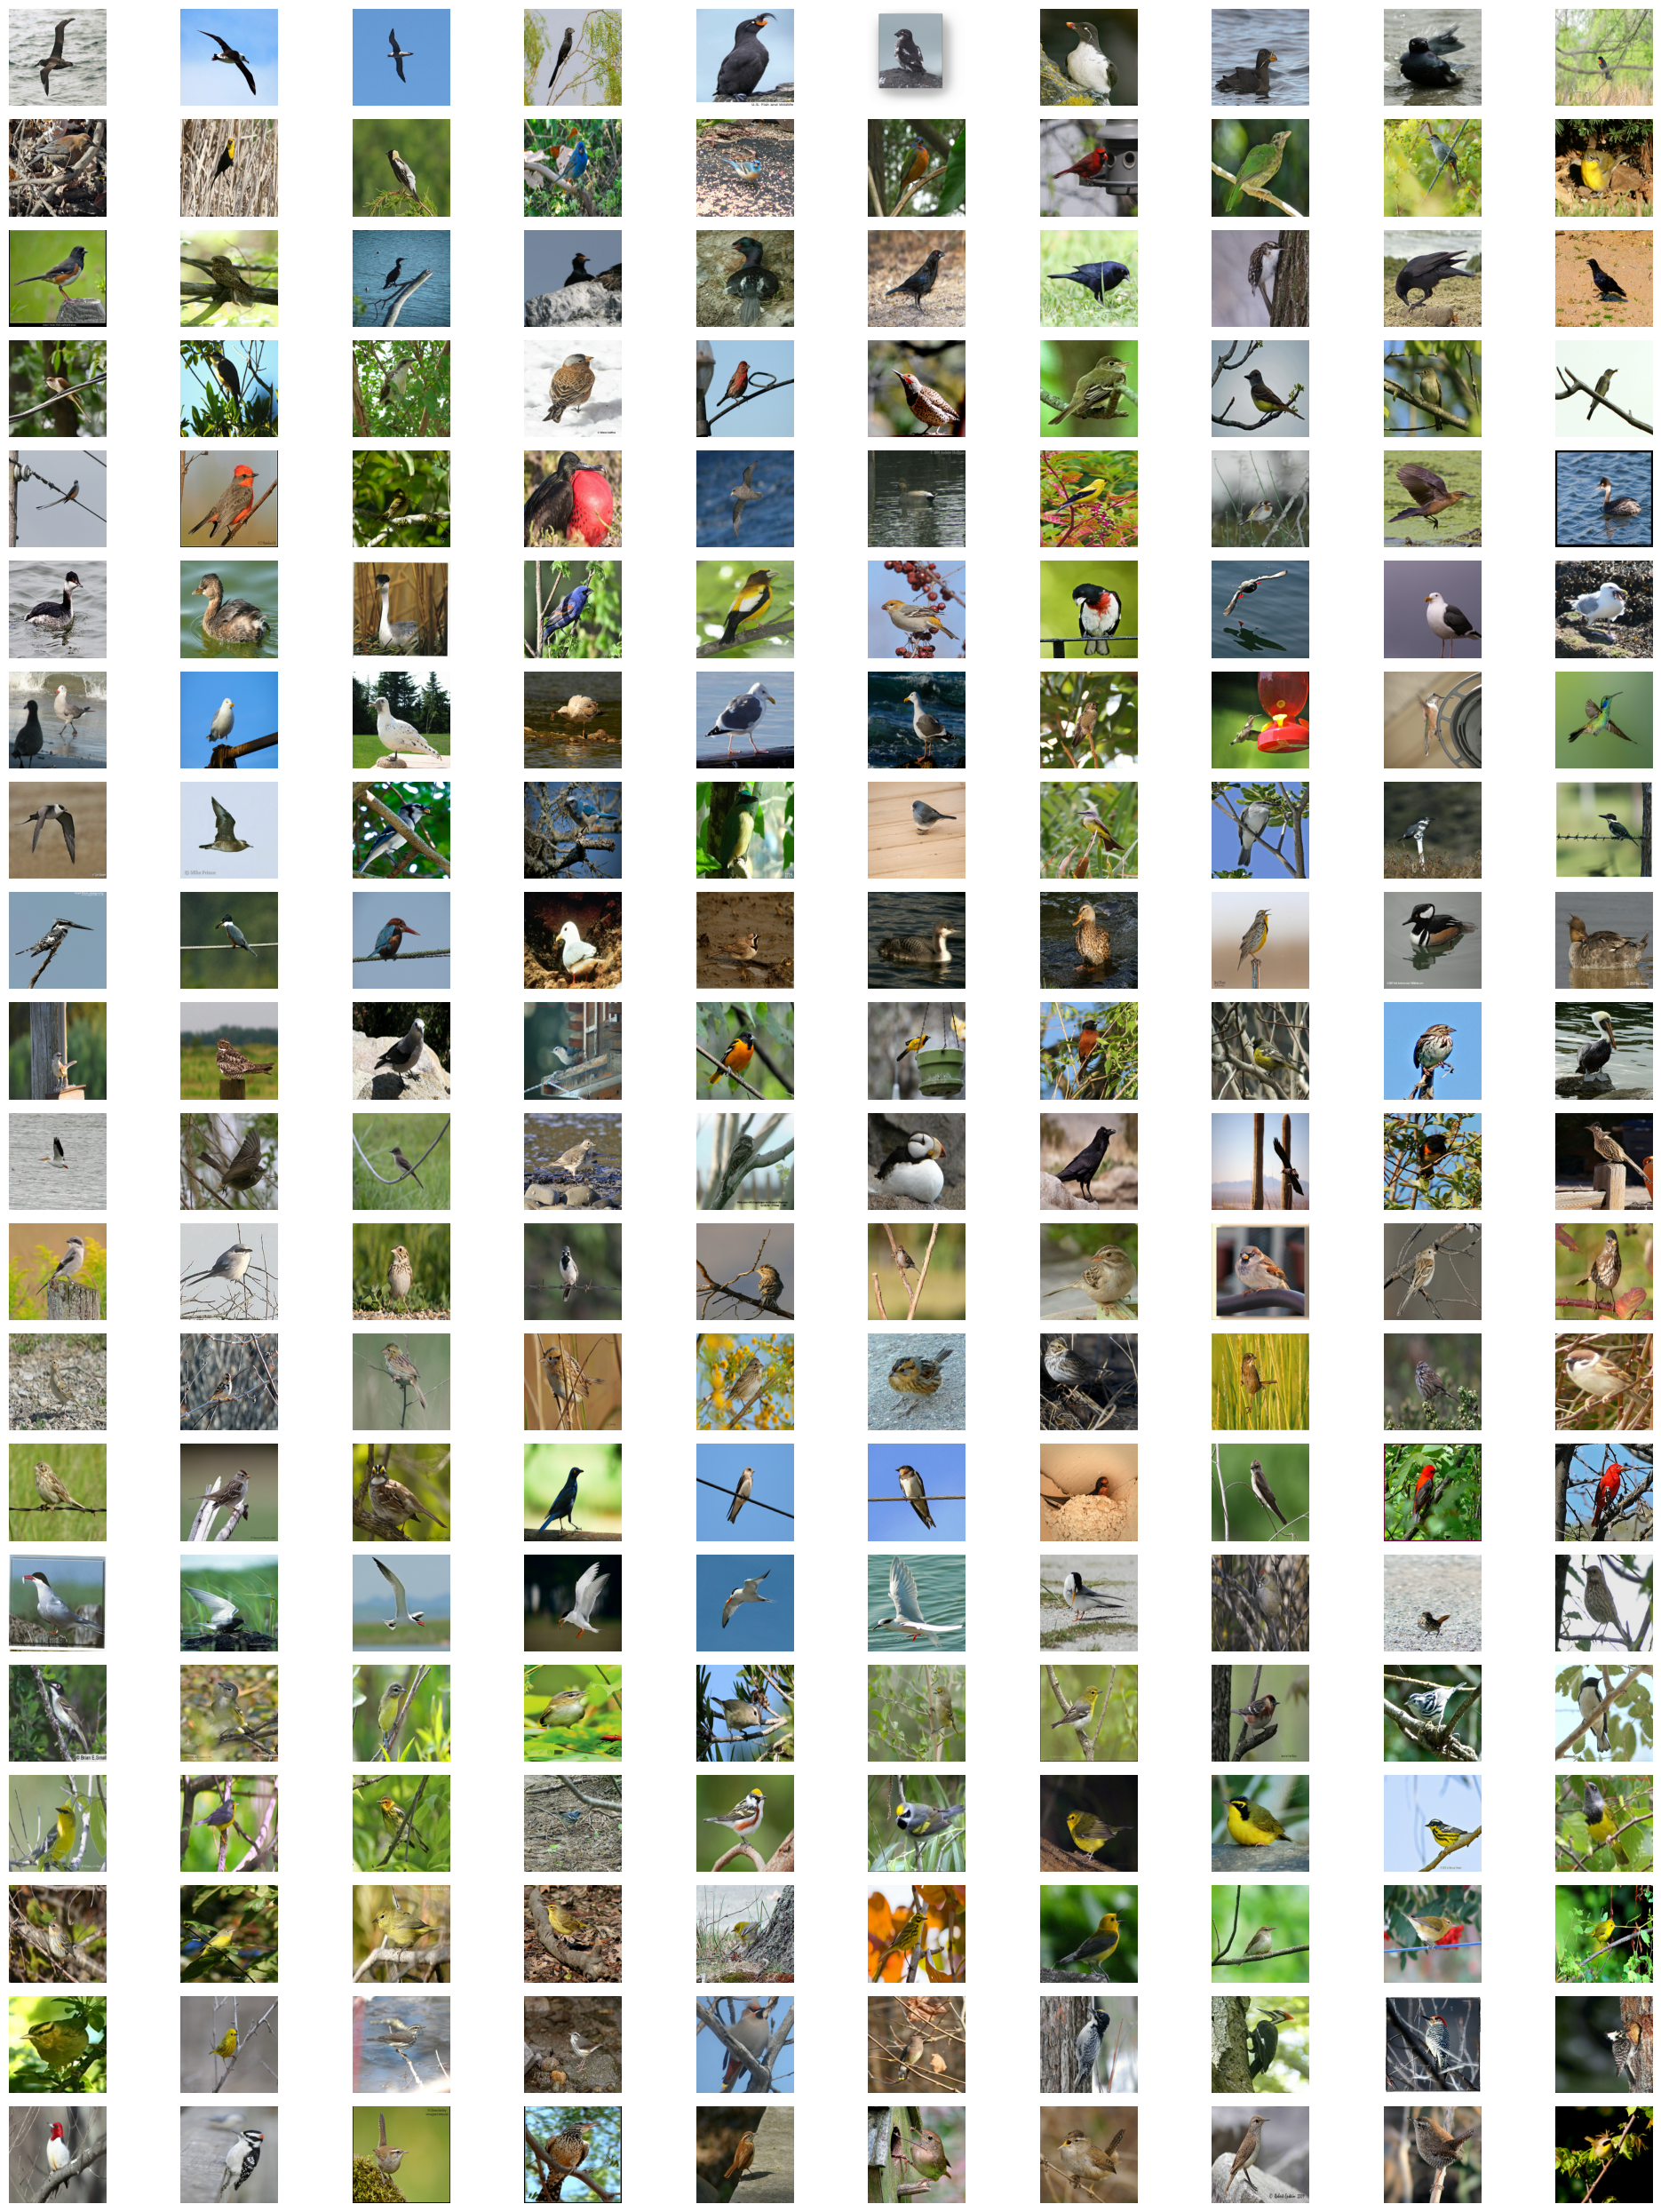

In [72]:
representatives = {class_name: None for class_name in train_ds.class_names}
    
for images, labels in train_ds.unbatch():
    class_index = tf.argmax(labels).numpy()
    class_name = train_ds.class_names[class_index]
    if representatives[class_name] is None:
        representatives[class_name] = images.numpy()  
            
    if all(image is not None for image in representatives.values()):
        break

plt.figure(figsize=(20, 25))
for i, (class_name, image) in enumerate(representatives.items()):
    plt.subplot(20, 10, i + 1)
    plt.imshow(image.astype("uint8"))
    #plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

/home/des/suns/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732790009.590045   20114 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732790009.751073   20114 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732790009.751162   20114 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732790009.756528   20114 cuda_executor.c